In [208]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent
class GradientDescent:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, w, grad):
        return w - self.lr * grad

# Adagrad
class Adagrad:
    def __init__(self, lr=0.01, epsilon=1e-8):
        self.lr = lr
        self.epsilon = epsilon
        self.cache = 0
    
    def update(self, w, grad):
        self.cache += grad**2
        return w - self.lr * grad / (np.sqrt(self.cache) + self.epsilon)

# RMSprop
class RMSprop:
    def __init__(self, lr=0.01, rho=0.9, epsilon=1e-8):
        self.lr = lr
        self.rho = rho
        self.epsilon = epsilon
        self.cache = 0
    
    def update(self, w, grad):
        self.cache = self.rho * self.cache + (1 - self.rho) * grad**2
        return w - self.lr * grad / (np.sqrt(self.cache) + self.epsilon)

# Adadelta
class Adadelta:
    def __init__(self, rho=0.9, epsilon=1e-8):
        self.rho = rho
        self.epsilon = epsilon
        self.cache = 0
        self.delta_w = 0
    
    def update(self, w, grad):
        self.cache = self.rho * self.cache + (1 - self.rho) * grad**2
        update = np.sqrt(self.delta_w + self.epsilon) * grad / np.sqrt(self.cache + self.epsilon)
        self.delta_w = self.rho * self.delta_w + (1 - self.rho) * update**2
        return w - 1e3 * update # TODO

# Adam
class Adam:
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.t = 0
    
    def update(self, w, grad):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * grad**2
        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)
        return w - self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

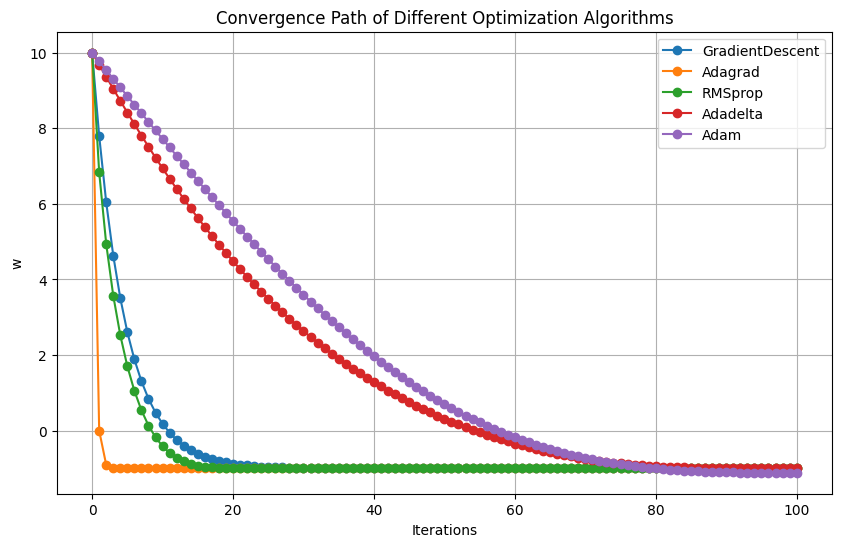

In [41]:
def quadratic_function(w):
    return w**2 + 2*w + 1

def quadratic_gradient(w):
    return 2*w + 2

# Initial weight
w_init = 10.0

# Number of iterations
iterations = 100

# Store paths for visualization
paths = {
    "GradientDescent": [w_init],
    "Adagrad": [w_init],
    "RMSprop": [w_init],
    "Adadelta": [w_init],
    "Adam": [w_init]
}

# Initialize optimizers
gd = GradientDescent(lr=0.1)
adagrad = Adagrad(lr=10)
rmsprop = RMSprop(lr=1)
adadelta = Adadelta()
adam = Adam(lr=0.23)

# Initialize weights
w_gd, w_adagrad, w_rmsprop, w_adadelta, w_adam = w_init, w_init, w_init, w_init, w_init

# Perform optimization
for i in range(iterations):
    grad = quadratic_gradient(w_gd)
    w_gd = gd.update(w_gd, grad)
    paths["GradientDescent"].append(w_gd)
    
    grad = quadratic_gradient(w_adagrad)
    w_adagrad = adagrad.update(w_adagrad, grad)
    paths["Adagrad"].append(w_adagrad)
    
    grad = quadratic_gradient(w_rmsprop)
    w_rmsprop = rmsprop.update(w_rmsprop, grad)
    paths["RMSprop"].append(w_rmsprop)
    
    grad = quadratic_gradient(w_adadelta)
    w_adadelta = adadelta.update(w_adadelta, grad)
    paths["Adadelta"].append(w_adadelta)
    
    grad = quadratic_gradient(w_adam)
    w_adam = adam.update(w_adam, grad)
    paths["Adam"].append(w_adam)

# Plotting the results
plt.figure(figsize=(10, 6))
for key, path in paths.items():
    plt.plot(path, marker='o', label=key)

plt.title("Convergence Path of Different Optimization Algorithms")
plt.xlabel("Iterations")
plt.ylabel("w")
plt.legend()
plt.grid(True)
plt.show()

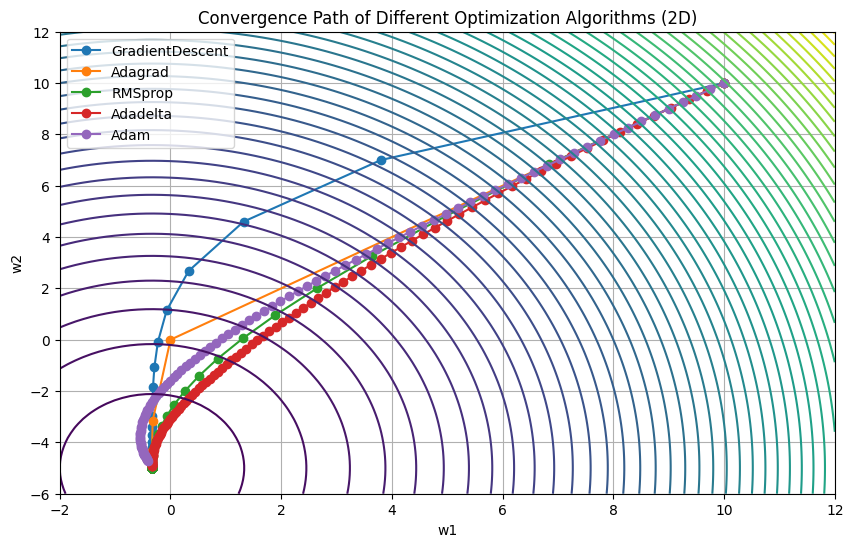

In [47]:
# Define the 2D quadratic function
def quadratic_function_2d(w):
    return 3*(w[0]**2) + w[1]**2 + 2*w[0] + 10*w[1] + 2

# Define the gradient of the 2D quadratic function
def quadratic_gradient_2d(w):
    return np.array([6*w[0] + 2, 2*w[1] + 10])

# Initial weight
w_init = np.array([10.0, 10.0])

# Number of iterations
iterations = 100

# Store paths for visualization
paths_2d = {
    "GradientDescent": [w_init],
    "Adagrad": [w_init],
    "RMSprop": [w_init],
    "Adadelta": [w_init],
    "Adam": [w_init]
}

# Initialize optimizers
gd = GradientDescent(lr=0.1)
adagrad = Adagrad(lr=10)
rmsprop = RMSprop(lr=1)
adadelta = Adadelta()
adam = Adam(lr=0.25)

# Initialize weights
w_gd, w_adagrad, w_rmsprop, w_adadelta, w_adam = w_init, w_init, w_init, w_init, w_init

# Perform optimization
for i in range(iterations):
    grad = quadratic_gradient_2d(w_gd)
    w_gd = gd.update(w_gd, grad)
    paths_2d["GradientDescent"].append(w_gd.copy())
    
    grad = quadratic_gradient_2d(w_adagrad)
    w_adagrad = adagrad.update(w_adagrad, grad)
    paths_2d["Adagrad"].append(w_adagrad.copy())
    
    grad = quadratic_gradient_2d(w_rmsprop)
    w_rmsprop = rmsprop.update(w_rmsprop, grad)
    paths_2d["RMSprop"].append(w_rmsprop.copy())
    
    grad = quadratic_gradient_2d(w_adadelta)
    w_adadelta = adadelta.update(w_adadelta, grad)
    paths_2d["Adadelta"].append(w_adadelta.copy())
    
    grad = quadratic_gradient_2d(w_adam)
    w_adam = adam.update(w_adam, grad)
    paths_2d["Adam"].append(w_adam.copy())

# Convert paths to numpy arrays for easy plotting
for key in paths_2d:
    paths_2d[key] = np.array(paths_2d[key])

# Plotting the results
plt.figure(figsize=(10, 6))

# paths_2d.pop("Adam")
# paths_2d.pop("Adadelta")
# paths_2d.pop("RMSprop")
# paths_2d.pop("Adagrad")
# paths_2d.pop("GradientDescent")

for key, path in paths_2d.items():
    plt.plot(path[:, 0], path[:, 1], marker='o', label=key)

# Plotting the contour of the function
w1, w2 = np.meshgrid(np.linspace(-2, 12, 100), np.linspace(-6, 12, 100))
Z = quadratic_function_2d([w1, w2])
plt.contour(w1, w2, Z, levels=50, cmap='viridis')

plt.title("Convergence Path of Different Optimization Algorithms (2D)")
plt.xlabel("w1")
plt.ylabel("w2")
plt.legend()
plt.grid(True)
plt.show()

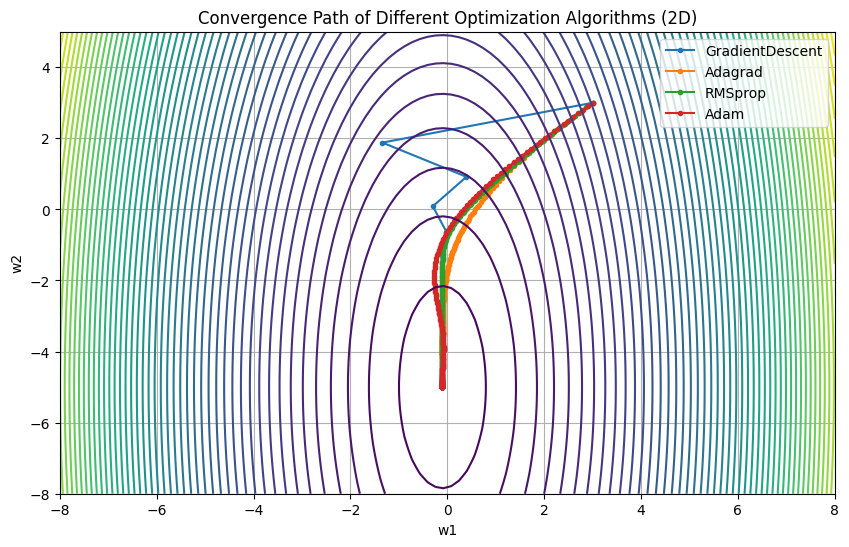

In [221]:
# Define the 2D quadratic function
def quadratic_function_2d(w):
    return 10*(w[0]**2) + w[1]**2 + 2*w[0] + 10*w[1] + 2

# Define the gradient of the 2D quadratic function
def quadratic_gradient_2d(w):
    return np.array([20*w[0] + 2, 2*w[1] + 10])

# Initial weight
w_init = np.array([3.0, 3.0])

# Number of iterations
iterations = 200

# Store paths for visualization
paths_2d = {
    "GradientDescent": [w_init],
    "Adagrad": [w_init],
    "RMSprop": [w_init],
    "Adadelta": [w_init],
    "Adam": [w_init]
}

# Initialize optimizers
gd = GradientDescent(lr=0.07)
adagrad = Adagrad(lr=0.4)
rmsprop = RMSprop(lr=0.04)
adadelta = Adadelta()
adam = Adam(lr=0.1)

# Initialize weights
w_gd, w_adagrad, w_rmsprop, w_adadelta, w_adam = w_init, w_init, w_init, w_init, w_init

# Perform optimization
for i in range(iterations):
    grad = quadratic_gradient_2d(w_gd)
    w_gd = gd.update(w_gd, grad)
    paths_2d["GradientDescent"].append(w_gd.copy())
    
    grad = quadratic_gradient_2d(w_adagrad)
    w_adagrad = adagrad.update(w_adagrad, grad)
    paths_2d["Adagrad"].append(w_adagrad.copy())
    
    grad = quadratic_gradient_2d(w_rmsprop)
    w_rmsprop = rmsprop.update(w_rmsprop, grad)
    paths_2d["RMSprop"].append(w_rmsprop.copy())
    
    grad = quadratic_gradient_2d(w_adadelta)
    w_adadelta = adadelta.update(w_adadelta, grad)
    paths_2d["Adadelta"].append(w_adadelta.copy())
    
    grad = quadratic_gradient_2d(w_adam)
    w_adam = adam.update(w_adam, grad)
    paths_2d["Adam"].append(w_adam.copy())

# Convert paths to numpy arrays for easy plotting
for key in paths_2d:
    paths_2d[key] = np.array(paths_2d[key])

# Plotting the results
plt.figure(figsize=(10, 6))

# paths_2d.pop("Adam")
paths_2d.pop("Adadelta")
# paths_2d.pop("RMSprop")
# paths_2d.pop("Adagrad")
# paths_2d.pop("GradientDescent")

for key, path in paths_2d.items():
    plt.plot(path[:, 0], path[:, 1], marker='.', label=key)

# Plotting the contour of the function
w1, w2 = np.meshgrid(np.linspace(-8, 8, 100), np.linspace(-8, 5, 100))
Z = quadratic_function_2d([w1, w2])
plt.contour(w1, w2, Z, levels=50, cmap='viridis')

plt.title("Convergence Path of Different Optimization Algorithms (2D)")
plt.xlabel("w1")
plt.ylabel("w2")
plt.legend()
plt.grid(True)
plt.show()